<a href="https://colab.research.google.com/github/SANDESHAHAHA/Data-science2/blob/main/Cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


In [ ]:
from tensorflow.keras import layers,models,datasets

In [ ]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
X_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
X_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
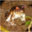

In [ ]:
X_train[0]

In [ ]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
y_train[:8]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7]], dtype=uint8)

In [ ]:
y_train.shape

(50000, 1)

y_train is two dimensional arary so converting the two dimensional array into single dimension

In [ ]:
y_train_flattened=y_train.reshape(1,-1).flatten()
y_train_flattened

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
y_test_flattened=y_test.reshape(1,-1).flatten()
y_test_flattened

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [ ]:
labels[0]

'airplane'

In [ ]:
def drawimg(i):
  plt.figure(figsize=(10,1))
  plt.imshow(X_train[i])
  plt.xlabel(labels[y_train_flattened[i]])

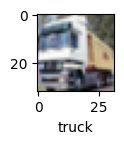

In [ ]:
drawimg(1)

In [ ]:
X_train=X_train/255
X_test=X_test/255
X_train[0]

array([[[0.00090734, 0.00095348, 0.00096886],
        [0.00066128, 0.00070742, 0.00069204],
        [0.00076894, 0.00073818, 0.00066128],
        ...,
        [0.00242983, 0.00202999, 0.0016609 ],
        [0.00233756, 0.00192234, 0.00156863],
        [0.00227605, 0.00190696, 0.00158401]],

       [[0.00024606, 0.00030757, 0.00030757],
        [0.        , 0.        , 0.        ],
        [0.00027682, 0.00012303, 0.        ],
        ...,
        [0.00189158, 0.00135333, 0.00084583],
        [0.00183007, 0.00127643, 0.00076894],
        [0.0018762 , 0.00133795, 0.00087659]],

       [[0.00038447, 0.00036909, 0.00032295],
        [0.00024606, 0.00010765, 0.        ],
        [0.00075356, 0.00041522, 0.00012303],
        ...,
        [0.00181469, 0.00129181, 0.00076894],
        [0.00184544, 0.00129181, 0.00076894],
        [0.00167628, 0.00112265, 0.00064591]],

       ...,

       [[0.00319877, 0.00261438, 0.00147636],
        [0.00309112, 0.00235294, 0.00052288],
        [0.00304498, 0

First we are making the artifical neural netwrok

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
32*32*3

3072

In [ ]:
ann_model =keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3072,activation='relu'),
    layers.Dense(1024,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
ann_model.fit(X_train,y_train_flattened,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2549 - loss: 2.0021
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3812 - loss: 1.7093
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4236 - loss: 1.6083
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4546 - loss: 1.5222
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4697 - loss: 1.4764


In [ ]:
ann_model.evaluate(X_test,y_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4756 - loss: 1.4662


[1.4704715013504028, 0.47200000286102295]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=ann_model.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.61      0.52      1000
           1       0.52      0.72      0.61      1000
           2       0.34      0.31      0.33      1000
           3       0.35      0.30      0.32      1000
           4       0.44      0.32      0.37      1000
           5       0.49      0.28      0.36      1000
           6       0.41      0.73      0.52      1000
           7       0.66      0.34      0.45      1000
           8       0.57      0.64      0.60      1000
           9       0.58      0.48      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.46     10000
weighted avg       0.48      0.47      0.46     10000



**Convulational Neural Network**

In [ ]:
cnn=keras.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# softmax basically normalizes the probability
# class1: 0.45
# class2: 0.67

# class1: (0.45)/(0.45+0.67)

In [ ]:
cnn.fit(X_train,y_train_flattened,epochs=20,validation_split=0.2)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1033 - loss: 2.3026 - val_accuracy: 0.0952 - val_loss: 2.3027
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0981 - loss: 2.3028 - val_accuracy: 0.0952 - val_loss: 2.3029
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0994 - loss: 2.3027 - val_accuracy: 0.0977 - val_loss: 2.3029
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0999 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3029
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1018 - loss: 2.3028 - val_accuracy: 0.0952 - val_loss: 2.3029
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0997 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3028
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1011 - loss: 2.3026 - val_accuracy: 0.0952 - val_loss: 2.3027
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1026 - loss: 2.3027 - 

In [ ]:
cnn.evaluate(X_test,y_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0988 - loss: 2.3026


[2.3026387691497803, 0.10000000149011612]

In [ ]:
def drawtest(i):
  plt.figure(figsize=(10,1))
  plt.imshow(X_test[i])
  plt.xlabel(labels[y_test_flattened[i]])
  plt.show()

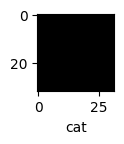

In [ ]:
drawtest(0)

In [ ]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.10078288, 0.09944048, 0.09996214, 0.100915  , 0.09929088,
        0.0983951 , 0.10043199, 0.10213203, 0.09905025, 0.09959926],
       [0.10078288, 0.09944048, 0.09996214, 0.100915  , 0.09929088,
        0.0983951 , 0.10043199, 0.10213203, 0.09905025, 0.09959926],
       [0.10078288, 0.09944048, 0.09996214, 0.100915  , 0.09929088,
        0.0983951 , 0.10043199, 0.10213203, 0.09905025, 0.09959926],
       [0.10078288, 0.09944048, 0.09996214, 0.100915  , 0.09929088,
        0.0983951 , 0.10043199, 0.10213203, 0.09905025, 0.09959926],
       [0.10078288, 0.09944048, 0.09996214, 0.100915  , 0.09929088,
        0.0983951 , 0.10043199, 0.10213203, 0.09905025, 0.09959926]],
      dtype=float32)

In [ ]:
y_pred_number=[np.argmax(element) for element in y_pred]
y_pred_number[0]

np.int64(7)

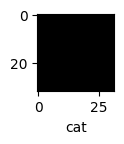

In [ ]:
drawtest(0)

In [ ]:
labels[7]

'horse'

In [ ]:
print(" Report : \n",classification_report(y_test,y_pred_number))

Classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.10      1.00      0.18      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("Classification Report : \n",classification_report(y_test,y_pred_number))

Classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.10      1.00      0.18      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
